In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Bernoulli Distribution

**TODO:** Give sufficient motivation for Bernoulli/binary distributions in general.

$$Bern(x|\mu) = \mu^x(1 - \mu)^{1 - x}$$

where

$$\begin{align*}
E[x] &= \mu \\
var[x] &= \mu
\end{align*}
$$

*Statement*: The above is true, as well as $\Sigma_{x=0}^1p(x|\mu) = 1$ and $H[x] = -\mu ln \mu - (1 - \mu)ln(1-\mu)$ is the entropy of the Bernoulli distribution.

*Proof*:
$$
\begin{align*}
\Sigma_0^1 \mu^x(1 - \mu)^{1 - x} &= \mu^0(1-\mu)^1 + \mu^1(1 - \mu)^0 \\
&= 1 - \mu + \mu = 1
\end{align*}
$$

Using the definition of discrete expectation value we have:

$$
E[x] = \Sigma_0^1 x p(x|\mu) = 0(1 - \mu) + 1(\mu) = \mu
$$

and 

$$\begin{align*}
E[x^2] = \Sigma_0^1 x^2 p(x|\mu) = 0(1-\mu) + 1(\mu) = \mu
\end{align*}$$

so

$$
var[x] = \mu - \mu^2 = \mu(1 - \mu)
$$

Lastly, the entropy of a discrete random variable x is given to be

$$
H[x] = -\Sigma_x p(x)lnp(x)
$$

so

$$\begin{align*}
H[x] &= -\Sigma_0^1p(x|\mu)lnp(x|\mu) \\
&= -(1-\mu)ln(1-\mu) - \mu ln\mu
\end{align*}
\blacksquare$$

### 

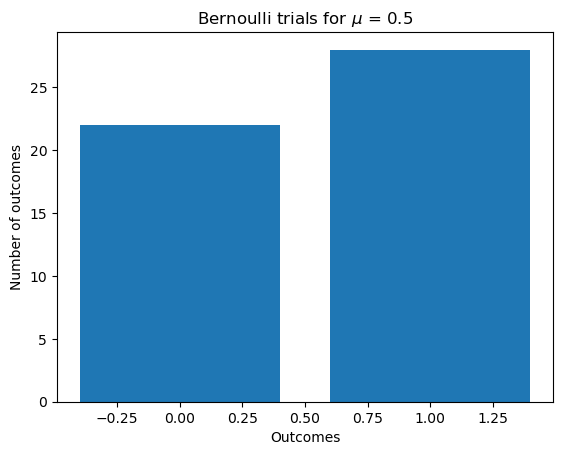

In [18]:
#Defining class for bernoulli distribution
class Bernoulli:
    def __init__(self, mu, random_seed=42):
        self.mu = mu
        self.seed = random_seed
    
    def pmf(self, x):
        return (self.mu**x)*((1-self.mu)**(1-x))
    
    def mean(self):
        return self.mu #Using E[mu] from above
    
    def var(self):
        return self.mu*(1-self.mu) #Using var from above
    
    def rvs(self, num_samples):
        #Define random variate sampling for bernoulli distribution,
        #return binary list of 0 and 1 of length num_samples
        np.random.seed(self.seed)
        ret = []
        for i in range(num_samples):
            if np.random.rand() <= self.mu:
                ret.append(1)
            else:
                ret.append(0)
        return np.array(ret)

#Plot 50 trial values as histogram
bern = Bernoulli(0.50)
plot_vals = np.unique(bern.rvs(50), return_counts=True)[1]
plt.bar([0,1], plot_vals)
plt.xlabel("Outcomes")
plt.ylabel("Number of outcomes")
plt.title(f"Bernoulli trials for $\mu$ = {bern.mu}")
plt.show()

## Likelihood Function

The likelihood function, assuming independent drawn samples from $p(x|\mu)$ and a dataset $D = \{x_1, \dots, x_n\}$ is

$$
p(D|\mu) = \prod_{n=1}^N p(x_n|\mu) = \prod_{n=1}^N \mu^{x_n}(1 - \mu)^{1 - x_n}
$$

So the log likelihood is given by

$$
ln p(D|\mu) = \Sigma_{n=1}^N \{x_nln\mu + (1 - x_n)ln(1 - \mu)\}
$$

Taking a derivative gives

$$
\begin{align*}
\frac{\partial lnp}{\partial \mu} &= \Sigma_{n=1}^N \frac{x_n}{\mu} - \frac{1-x_n}{1-\mu} = 0\\
\Sigma_{n=1}^N \frac{x_n}{\mu} &= \Sigma_{n=1}^N \frac{1-x_n}{1-\mu} \\
\Sigma_{n=1}^N x_n &= \Sigma_{n=1}^N \mu \\
\mu_{MLE} &= \frac{1}{N}\Sigma_{n=1}^N x_n
\end{align*}
$$

where $\mu_{ML}$ is the maximum likelihood estimator for the Bernoulli distribution. It is also called the **sample mean**. This means, for example, the probability of a coin flip landing heads will be the fraction of number of heads out of the total number of coin flips. There is an issue though! This introduces a bias, if we only ever see heads in our dataset, we will find that the MLE becomes 1 -- so all future productions should give heads. We want to introduce a prior over $\mu$ to reflect the fact that the coin could be fair, for example.

# Binomial Distribution

We wish to include in the Bernoulli distribution a way to model the number of observations of x=1 given that the dataset has size $N$. The number of ways to choose m objects out of $N$ identical objects is 

$$
\binom{N}{m} = \frac{N!}{(N-m)!m!}
$$

so the Binomial distribution is defined as

$$
Bin(m|N,\mu) = \binom{N}{m} \mu^m(1-\mu)^{N-\mu}
$$

In [ ]:
##TODO: Implement and plot examples
class Binom:
    def __init__(self, mu, m, N):
        self.mu = mu
        self.m = m
        self.N = N
    
    def pmf(self):
        return None

# Beta Distribution

We previously identified an issue in the bernoulli (and binomial) distribution -- the lack of a prior means we are very likely to make incorrect decisions with little data. For example, if we only see heads on the first 3 coin flips, we will only ever predict heads using this model. This means we need to include a prior distribution to reflect the knowledge we have of the scenario on top of the data that we observed.

To motivate our choice of prior, note that the likelihood function of the Bernoulli distribution is $\mu^x(1-\mu)^{1-x}$. Given the definition of the posterior:

$$
p(\theta | x) = \frac{p(x|\theta)p(\theta)}{p(x)}
$$

we see that we want the prior to be of the same functional form as the likelihood (called **conjugacy**). The Beta distribution is then given by

$$
Beta(\mu| a, b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}
$$

where

$$
\Gamma(x) = \int_0^{\infty} u^{x-1}e^{-u}du
$$

We now prove a few statements about the Beta distribution.

*Statement: (PRML Exercise 2.4)* The Beta distribution is normalized,

$$
\int_0^1 Beta(\mu|a,b)d\mu = 1
$$

*Proof:*

This statement is equivalent to showing that
$$
\int_0^1 \mu^{a-1}(1-\mu)^{b-1}d\mu = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}
$$

Following from the definition of the gamma function above, 

$$
\begin{align*}
\Gamma(a)\Gamma(b) &= \int_0^{\infty}e^{-x}x^{a-1}dx\int_0^{\infty}e^{-y}y^{b-1}dy\\
&=\int_0^{\infty}\int_0^{\infty}e^{-(x+y)}x^{a-1}y^{b-1}dxdy \\
&=\int_0^{\infty}\int_0^te^{-t}x^{a-1}(t-x)^{b-1}dxdt \\
&=\int_0^{\infty}\int_0^1e^{-t}(\mu t)^{a-1}(t-\mu t)^{b-1}td\mu dt \\
&=\int_0^{\infty}\int_0^1e^{-t}t^{a-1}\mu^{a-1}t^{b-1}(1-\mu)^{b-1}td\mu dt \\
&=\int_0^1(\int_0^{\infty}e^{-t}t^{a+b-1}dt)\mu^{a-1}(1-\mu)^{b-1}dt\\
&=\Gamma(a+b)\int_0^1\mu^{a-1}(1-\mu)^{b-1}d\mu
\end{align*}
$$
We've thus showed the corresponding relation above$_\blacksquare$

*Statement: (PRML Exercise 2.5)* The mean and variance of the beta distribution are given by:
$$
\begin{align*}
E[\mu] &= \frac{a}{a + b}\\
var[\mu] &= \frac{ab}{(a+b)^2(a+b+1)}
\end{align*}
$$

*Proof:*
$$
\begin{align*}
E[\mu]&= \int_0^1\mu Beta(\mu|a,b)d\mu \\
&= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\int_0^1\mu^{(a+1)-1}(1-\mu)^{b-1}d\mu\\
&=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\frac{\Gamma(a+1)\Gamma(b)}{\Gamma(a+b+1)}\\
&=\frac{\Gamma(a+b)\Gamma(a+1)}{\Gamma(a)\Gamma(a+b+1)}\\
&=\frac{\Gamma(a+b)\Gamma(a)}{\Gamma(a)\Gamma(a+b)}\frac{a}{a+b}\\
&=\frac{a}{a+b}
\end{align*}
$$

Note we make use of the property of Gamma functions:

$$
\Gamma(a+1) = a\Gamma(a)
$$

which is proved in the appendix below. Next we calculate the variance using a similar technique.

$$
\begin{align*}
E[\mu^2] &= \int_0^1 \mu^2 Beta(\mu|a,b)d\mu \\
&=\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\int_0^1\mu^{(a+2)-1}(1-\mu)^{b-1}d\mu\\
&=\frac{\Gamma(a+b)\Gamma(a+2)}{\Gamma(a)\Gamma(a+b+2)}\\
&=\frac{a(a+1)}{(a+b)(a+b+1)}
\end{align*}
$$

where the last step follows from 
$$\begin{align*}
\Gamma(a+2) &= \Gamma(a+1+1) = (a+1)\Gamma(a+1) = a(a+1)\Gamma(a)\\
\Gamma(a+b+2) &= \Gamma(a+b+1+1) = (a+b+1)\Gamma(a+b+1) = (a+1)(a+b+1)\Gamma(a+b)
\end{align*}
$$

Putting this into the definition of variance gives

$$
\begin{align*}
var[\mu] &= E[\mu^2] - E^2[\mu] \\
&= \frac{\Gamma(a+b)\Gamma(a+2)}{\Gamma(a)\Gamma(a+b+2)} - (\frac{a^2}{(a+b)^2})\\
&=\frac{a(a+1)(a+b) - a^2(a+b+1)}{(a+b)^2(a+b+1)}\\
&=\frac{ab}{(a+b)^2(a+b+1)}
\end{align*}_\blacksquare
$$

The posterior of the beta distribution is then another beta distribution given by:
$$
p(\mu. m, l, a, b) = \frac{\Gamma(m + a + l + b)}{\Gamma(m + a)\Gamma(l + b)}\mu^{m+a-1}(1-\mu)^{l + b - 1}
$$

where $m$, $N$ are defined as with the binomial distribution above and $l = N - m$. 

Below we plot the Beta distribution for a variety of hyperparameters.

/var/folders/gv/0bb9p9810zqdhslznc7lff680000gn/T/ipykernel_19192/467270864.py:14: RuntimeWarning: divide by zero encountered in power
  return coef * (mu**(self.a - 1)) * ((1 - mu)**(self.b - 1))


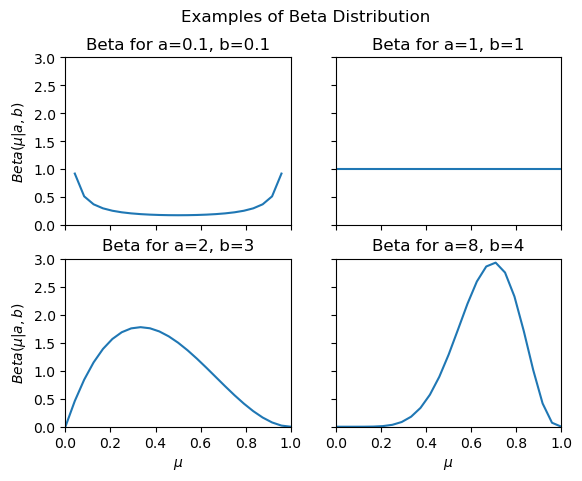

In [47]:
class Beta:
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def mean(self):
        return self.a / (self.a + self.b)
    
    def var(self):
        return (self.a * self.b) / ((self.a + self.b)**2 * (self.a + self.b + 1))
    
    def pdf(self, mu):
        coef = math.gamma(self.a + self.b)/(math.gamma(self.a)*math.gamma(self.b))
        return coef * (mu**(self.a - 1)) * ((1 - mu)**(self.b - 1))

#Plot beta distribution for variety of hyperparameters a, b over mu in [0, 1]
a_vals = [0.1, 1, 2, 8]
b_vals = [0.1, 1, 3, 4]
mu_vals = np.linspace(0, 1, 25)
results = []

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle("Examples of Beta Distribution")
for a, b in zip(a_vals, b_vals):
    beta = Beta(a, b)
    results.append(beta.pdf(mu_vals))

for i, ax in enumerate(fig.get_axes()):
    ax.set_title(f"Beta for a={a_vals[i]}, b={b_vals[i]}")
    ax.plot(mu_vals, results[i])
    ax.set(xlabel="$\mu$", ylabel="$Beta(\mu | a, b)$", xlim=[0, 1], ylim=[0, 3])

#Hide inner labels    
for ax in fig.get_axes():
    ax.label_outer()

Notice that as the value of our hyperparameters increase, the peak of our posterior increases and gets sharper. This leads to the intuition that the hyperparameters reflect the number of observations present in that distribution.

## Bayesian Learning with Beta

There is a natural sequential learning paradigm that arises as a result of this formulation of our likelihood. For each new observation, we can multiply the current posterior by the likelihood function for the new observation, and then normalize to obtained the new posterior. For the beta distribution, this update simply corresponds to increasing the value of the hyperparameters $a$ and $b$, where $a$ corresponds to to the number of observations of $x = 1$ and $b$ corresponds to the updates of $x = 0$! Specifically

$$
\mu^{m + a - 1}\mu^{1 + a - 1} = \mu^{m + (a + 1) - 1}
$$

where N = m = 1 is the same as adding a single observation of $x = 1$.

In [ ]:
#TODO: Show updated beta distribution after increasing m number of observations as an animation

# General Bayesian Learning

We've seen that increasing the number of observations reduces the variance within the posterior of the beta distribution. We might wonder if this is a general property of Bayesian learning. Here we generally address that question.

Consider a Bayesian learning problem with parameter $\pmb{\theta}$ and an observed dataset $D$ with joint distribution $p(\pmb{\theta}, D)$. 

Using the results from the appendix, we have the results

$$
E_{\pmb{\theta}}[\pmb{\theta}] = E_D[E_{\pmb{\theta}}[\pmb{\theta}|D]]
$$

which says the average posterior mean of $\pmb{\theta}$ is equal to the average of the prior. Also

$$
var_{\pmb{\theta}}[\pmb{\theta}] = E_D[var_{\pmb{\theta}}[\pmb{\theta}|D]] + var_D[E_{\pmb{\theta}}[\pmb{\theta}|D]]
$$

says that the prior variance of $\pmb{\theta}$ is, on average, greater than the posterior variance. The difference in variance from the prior to the posterior is in the variance of the posterior's mean (the rightmost term in the above equation).

# Appendix

### Gamma Functions
*Statement:*
$$ \Gamma(x+1) = x\Gamma(x)$$

*Proof:* **TODO**

### Expectation and Variance of Joint Distributions
*Statement: (PRML Exercise 2.8)*
$$
\begin{align*}
E[x] &= E_y[E_x[x|y]] \\
var[x] &= E_y[var_x[x|y]] + var_y[E_x[x|y]]
\end{align*}
$$

*Proof:* **TODO**